
# AI-DRIVEN PROCUREMENT FRAUD DETECTION SYSTEM


 
<img src="./images/istockphoto-1395523535-612x612.jpg" width="1000px" height="350px">
 
 

# 1. Business Understanding

## 1.1 Business Overview








>Procurement fraud is a persistent challenge across sectors, impacting both financial integrity and public trust. Fraud schemes like
bribery, bid rigging, and collusion exploit weaknesses in procurement processes, resulting in inflated costs, resource misallocation,
and compromised service quality. Traditional fraud detection methods, reliant on manual checks and set rules, are often insufficient
due to the evolving nature of fraud schemes. Here, Artificial Intelligence (AI) provides a solution by offering real-time, scalable,
and data-driven insights into procurement practices. AI-powered fraud detection can analyze massive datasets, identify anomalous
patterns, and predict potential fraudulent activities. This project leverages machine learning models to create an
intelligent procurement fraud detection system designed to identify collusive behaviors, inflated invoicing, and other red flags in
procurement transactions. The goal is to support governance efforts, optimize resource use, and foster transparency in public and
private sector procurement.

## 1.2. Literature Review

### 1.2.1 AI and Machine Learning in Fraud Detection

Artificial Intelligence has made significant strides in fraud detection through the deployment of machine learning models capable
of processing vast amounts of structured and unstructured data (Boute et al., 2022). Traditional rule-based systems often fail to
capture the nuances of fraud, especially as perpetrators become more adept. Studies have demonstrated that AI, particularly
machine learning, is essential in identifying complex fraud patterns that elude human oversight.
Machine learning algorithms like Random Forest a nd XGBoost have shown efficacy in detecting anomalies in financial
transactions (Brown & Elliott, 2020). For example, Random Forest, a robust ensemble method, has proven effective in handling
imbalanced datasets—a common characteristic in fraud detection—by combining multiple decision trees to improve accuracy and
reduce variance (Bekker & Davis, 2020). In contrast, XGBoost's gradient boosting approach is noted for its speed and accuracy in
high-dimensional datasets, which is advantageous in real-time fraud detection settings (Hastie & Friedman, 2019)

### 1.2.2 Applications of AI in Procurement Fraud

AI-driven fraud detection systems can identify procurement fraud schemes, including fictitious invoicing, bid rigging, and payment
diversion. According to research by Zhong et al. (2020), AI's capability to sift through unstructured data—such as transaction logs
and email records—enhances detection of fraud schemes that involve collusion or conflicts of interest. Furthermore, AI systems
can recognize vendor favoritism by analyzing transaction histories and bid patterns, identifying correlations that may signal
collusion (Zhang, 2020).
Additionally, Boute et al. (2022) emphasize the role of predictive analytics in preventing procurement fraud. Predictive models
trained on historical fraud data can forecast potential fraud scenarios by flagging transactions that deviate from established norms.
This predictive power is particularly valuable for high-risk sectors where real-time monitoring is essential.

### 1.2.3 Predictive Analytics in Fraud Detection




Predictive analytics enables early identification of fraud by analyzing data patterns to predict future risks. This approach
harnesses machine learning algorithms such as logistic regression, neural networks, and decision trees to assign fraud risk scores
to transactions. Research shows that predictive analytics models reduce false positives by learning from historical data, adjusting
risk thresholds dynamically (Amiram et al., 2015). For instance, logistic regression models are effective for binary classification
tasks, categorizing transactions as "fraud" or "non-fraud" based on predefined variables (Wang & Xu, 2018).
In procurement fraud, predictive models can enhance detection accuracy by focusing on key fraud indicators, such as bid price
variances, abnormal bidding patterns, and vendor relationships (Fraud Fighter, 2023). Combining predictive analytics with
anomaly detection enhances fraud identification capabilities, ensuring that high-risk transactions are flagged for further review

## 1.3 Problem Statement


Procurement fraud significantly impacts economic stability, as it leads to increased project costs, resource misallocation, and
eroded public trust. Current detection methods are limited in scope and effectiveness, unable to adapt to the changing strategies
employed by fraudsters. This project addresses these gaps by developing an AI-driven fraud detection system tailored to
procurement, capable of identifying unusual bidding behaviors, inflated pricing, and other fraudulent activities. The system aims
to offer a scalable solution that not only improves detection accuracy but also integrates seamlessly into existing financial
infrastructures.

### 1.4 Justification


An AI-based procurement fraud detection system provides a necessary technological advancement for modern financial and
governance systems. AI enables faster, more accurate detection of procurement fraud, minimizing financial losses and supporting
transparent governance. By automating fraud detection, this project ensures consistent and unbiased monitoring, contributing to
the integrity and efficiency of procurement processes. This system will particularly benefit sectors susceptible to fraud, such as
government and large enterprises, where high transaction volumes make manual monitoring impractical.

## 1.5. Objectives

### 1.5.1 General Objective

To design and implement an AI-powered fraud detection system for procurement, enhancing fraud identification accuracy and
promoting transparency in financial transactions.

### 1.5.2 Specific Objectives

1. To detect anomalous bidding patterns, vendor collusion, and inflated pricing in procurement data.
2. To reduce false positives in fraud detection, ensuring high precision.
3. To establish a transparent reporting system for fraud investigations.
4. To ensure compliance with data protection standards and reduce model bias.
5. To integrate the fraud detection system into existing procurement platforms for government and enterprise use.

## 1.6 StakeHolders

1. Procurement Officers: Responsible for overseeing purchasing processes, they benefit from AI insights to detect potential fraud early.
2. Compliance and Audit Departments: These teams ensure that procurement activities adhere to legal and ethical standards and would rely on the system for enhanced fraud detection capabilities.
3. Senior Management and Executives: Decision-makers in both public and private sectors, such as CEOs, CFOs, or Directors of Procurement, would support and rely on the project for safeguarding organizational resources.
4. Regulatory Authorities: Government bodies and anti-fraud agencies are interested in upholding fair procurement practices and preventing fraud across industries.
5. IT and Data Science Teams: These teams implement, maintain, and refine the AI system, ensuring its integration with other systems and adapting it to emerging fraud patterns.
6. Vendors and Suppliers: While indirectly affected, vendors would be stakeholders as the system may help in establishing trustworthiness and compliance standards in procurement.
7. Internal and External Auditors: Auditors will use the system to streamline reviews, detect issues proactively, and provide independent assessments of procurement integrity.
8. End Users and Beneficiaries of Procurement: Those who rely on services and products procured (e.g., department heads, project teams) benefit from improved resource allocation and quality of procured items or services.
9. Anti-Corruption NGOs and Advocacy Groups: These groups may advocate for AI adoption to foster transparency and accountability in procurement, especially in the public sector.



## 2. Data Understanding
The data is from government website [Link Here](https://www.tenders.go.ke/)
This is the column description for each column

<table border="1">
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Amount</td>
      <td>The monetary value of the tender or contract awarded.</td>
    </tr>
    <tr>
      <td>Award Date</td>
      <td>The date when the tender or contract was officially awarded to the supplier.</td>
    </tr>
    <tr>
      <td>Tender Title</td>
      <td>The description or title of the tender, indicating the purpose or items/services being procured.</td>
    </tr>
    <tr>
      <td>Eval Completion Date</td>
      <td>The date when the evaluation of bids or proposals was completed.</td>
    </tr>
    <tr>
      <td>Notification of Award Date</td>
      <td>The date on which the award notification was issued to the winning bidder.</td>
    </tr>
    <tr>
      <td>Sign Date</td>
      <td>The date when the contract was officially signed by all parties involved.</td>
    </tr>
    <tr>
      <td>Start Date</td>
      <td>The date when the contracted work or service provision officially began.</td>
    </tr>
    <tr>
      <td>End Date</td>
      <td>The date when the contracted work or service provision was scheduled to conclude.</td>
    </tr>
    <tr>
      <td>Created By</td>
      <td>Likely an identifier (e.g., user ID) of the person or system that entered or created the record in the database.</td>
    </tr>
    <tr>
      <td>Financial Year</td>
      <td>The fiscal year during which the tender or contract falls (e.g., 2018/2019).</td>
    </tr>
    <tr>
      <td>amount_zscore</td>
      <td>The z-score of the amount, a statistical measure that indicates how many standard deviations the tender amount is from the mean of the dataset.</td>
    </tr>
    <tr>
      <td>high_amount_anomaly</td>
      <td>A binary flag (0 or 1) indicating whether the tender amount is considered unusually high based on anomaly detection methods.</td>
    </tr>
    <tr>
      <td>is_weekend_award</td>
      <td>A binary flag (0 or 1) indicating if the award date falls on a weekend.</td>
    </tr>
    <tr>
      <td>month_of_fy</td>
      <td>The month of the financial year in which the award occurred (e.g., September = 9).</td>
    </tr>
    <tr>
      <td>is_fy_end</td>
      <td>A binary flag (0 or 1) indicating if the award occurred near the end of the financial year.</td>
    </tr>
    <tr>
      <td>pe_frequency</td>
      <td>The frequency of tendering activity for the procuring entity (PE), indicating how often it awards contracts.</td>
    </tr>
    <tr>
      <td>daily_contracts</td>
      <td>The number of contracts awarded on the same day by the procuring entity.</td>
    </tr>
    <tr>
      <td>multiple_contracts_same_day</td>
      <td>A binary flag (0 or 1) indicating if multiple contracts were awarded on the same day by the same entity.</td>
    </tr>
    <tr>
      <td>fraud_label</td>
      <td>A binary label (0 or 1) indicating if the tender or contract is suspected of being fraudulent (based on specific criteria).</td>
    </tr>
    <tr>
      <td>PE Name_encoded</td>
      <td>Encoded identifier for the procuring entity’s name, used for anonymization or computational purposes.</td>
    </tr>
  </tbody>
</table>


##### Column decsriptions

In [1]:
# IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# SKLEARN
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, recall_score

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import pickle
import warnings

# VISUALIZATION LIBRARIES
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import calendar
import pickle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score
 
 






ModuleNotFoundError: No module named 'pandas'

DataUnderstanding class to load, concatenate, and analyze datasets. It provides insights like shape, columns, unique values, missing data, and duplicates. It loads data from "published_contracts.xlsx" for further exploration.

In [ ]:
                                        class DataUnderstanding():
    """Class that provides an understanding of a dataset"""

    def __init__(self, data=None):
        """Initialization"""
        self.df = data

    def load_data(self, path):
        """Load the data"""
        if self.df is None:

            self.df = pd.read_excel(path)
        return self.df

    def concat_data(self, other_df):
        """Concatenate the current dataframe with another dataframe vertically"""
        if self.df is not None and other_df is not None:
            self.df = pd.concat([self.df, other_df], axis=0, ignore_index=True)
        return self.df

    def understanding(self):
        """Provides insights into the dataset"""
        # Info
        print("INFO")
        print("-" * 4)
        self.df.info()

        # Shape
        print("\n\nSHAPE")
        print("-" * 5)
        print(f"Records in dataset: {self.df.shape[0]} with {self.df.shape[1]} columns.")

        # Columns
        print("\n\nCOLUMNS")
        print("-" * 6)
        print("Columns in the dataset are:")
        for idx in self.df.columns:
            print(f"- {idx}")

        # Unique Values
        print("\n\nUNIQUE VALUES")
        print("-" * 12)
        for col in self.df.columns:
            print(f"Column {col} has {self.df[col].nunique()} unique values")
            if self.df[col].nunique() < 12:
                print(f"Top unique values in {col} include:")
                for idx in self.df[col].value_counts().index:
                    print(f"- {idx}")
            print("")

        # Missing or Null Values
        print("\nMISSING VALUES")
        print("-" * 15)
        for col in self.df.columns:
            print(f"Column {col} has {self.df[col].isnull().sum()} missing values.")

        # Duplicate Values
        print("\n\nDUPLICATE VALUES")
        print("-" * 16)
        print(f"The dataset has {self.df.duplicated().sum()} duplicated records.")

# Initialize data understanding
data = DataUnderstanding()

# Load the first dataset
data_path1 = "data/published_contracts.xlsx" # The path to your Excel file
df = data.load_data(data_path1)


df.head()

,Contract Number,Amount,Award Date,Tender Title,Eval Completion Date,Notification Of Award Date,Sign Date,Start Date,End Date,Agpo Certificate Number,Awarded Agpo Group Id,Created By,Terminated,Financial Year,Quarter,Tender Ref.,PE Name,Supplier Name,No. of B.O.I,Created At
0,0015.1,1962488.0,2018-09-26,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-09-25,2018-09-26,2018-09-26,2018-09-26,2018-10-25,NaN,NaN,1,NaN,2018/2019,Q1,KEMSA/ONT 06/2017-2019,Higher Education Loan Board,VIABLE DECO SOLUTIONS LIMITED,NaN,2019-01-31 09:55:20
1,38632,257736.0,2018-10-02,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-09-25,2018-10-04,2018-10-05,2018-10-08,2018-10-23,NaN,NaN,1,NaN,2018/2019,Q2,KEMSA/ONT 06/2017-2019,Kenya Post Office Saving Bank,COMPUTERWAYS LIMITED,NaN,2019-02-19 10:14:13
2,38631,254736.0,2018-09-25,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-09-19,2018-10-02,2018-10-05,2018-10-12,2018-11-12,NaN,NaN,1,NaN,2018/2019,Q1,KEMSA/ONT 06/2017-2019,Kenya Post Office Saving Bank,REALISTIC SYSTEMS AND TECHNOLOGIES,NaN,2019-02-27 14:28:26
3,0189,149300.0,2019-02-19,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2019-01-15,2019-02-07,2019-02-11,2019-02-11,2019-03-11,NaN,NaN,1,NaN,2018/2019,Q3,KEMSA/ONT 06/2017-2019,Embu,JIMRIVER CARGO LOGISTICS LIMITED,NaN,2019-03-15 10:03:54
4,LPO 1079.,81500.0,2018-12-27,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-12-27,2018-12-27,2018-12-27,2018-12-27,2019-01-26,NaN,NaN,1,NaN,2018/2019,Q2,KEMSA/ONT 06/2017-2019,Higher Education Loan Board,MATKY INVESTMENTS,NaN,2019-03-17 18:11:54


In [3]:
# Get an understanding of the dataset
data.understanding()

INFO
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81549 entries, 0 to 81548
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Contract Number             81477 non-null  object 
 1   Amount                      80715 non-null  float64
 2   Award Date                  81549 non-null  object 
 3   Tender Title                81534 non-null  object 
 4   Eval Completion Date        81549 non-null  object 
 5   Notification Of Award Date  81549 non-null  object 
 6   Sign Date                   69038 non-null  object 
 7   Start Date                  80561 non-null  object 
 8   End Date                    80537 non-null  object 
 9   Agpo Certificate Number     25006 non-null  object 
 10  Awarded Agpo Group Id       24055 non-null  object 
 11  Created By                  81549 non-null  int64  
 12  Terminated                  87 non-null     float64
 13  Financial Year       

#### Summary Observations:

- Data Completeness: Several columns, especially those related to specific certifications and awards (e.g., Agpo Certificate Number and Awarded Agpo Group Id), have significant missing values, which may affect analyses focused on these categories.
- Data Quality: With 141 duplicates and varying levels of missing values, some data cleaning will be required, particularly for categorical columns that are missing a large portion of data.
- Potential Areas for Analysis: Despite missing values, substantial information is available regarding contract details (e.g., Amount, PE Name, Supplier Name), dates, and contract progression stages. These can support analyses related to contract timelines, supplier diversity, and financial tracking over different periods (fiscal years and quarters).
- The dataset has 124 duplicate values

#### Here's an analysis of each column's relevance for fraud detection, ranked by importance

Temporal Columns (Pattern Analysis):


- Award Date
- Eval Completion Date
- Notification Of Award Date
- Sign Date
- Start Date
- End Date

These columns can reveal suspicious patterns like:

- Backdating
- Unrealistic timelines
- Process sequence violations


#### Financial Information:

- Amount

#### Critical for detecting:

- Split purchases
- Threshold avoidance
- Unusual pricing patterns
- Round numbers (often indicative of fraud)

#### Entity Information:


- Supplier Name
- PE Name (Procuring Entity)

#### Important for:

- Shell company detection
- Multiple awards to same supplier
- Cross-referencing with known fraudulent entities

#### Medium Relevance:

#### Process Identifiers:

- Contract Number
- Tender Ref.

#### Useful for:

- Detecting duplicate contracts
- Sequential pattern analysis
- Reference number manipulation

#### Classification Fields:

- Financial Year
- Quarter

#### Helpful for:

- End-of-period fraud patterns
- Budget exhaustion patterns
- Seasonal anomalies

#### Compliance Indicators:

- Agpo Certificate Number
- Awarded Agpo Group Id

#### Can indicate:

- Certificate fraud
- Qualification manipulation








## 3. Preproccessing

### 3.1 Data Cleaning

- Load Data: Initializes DataCleaning and loads an Excel file published_contracts.xlsx.
- Remove Duplicates: Identifies and removes duplicate rows.
- Drop Columns: Removes irrelevant columns.
- Clean Column Names: Strips whitespace from column names.
- Convert to Date: Converts specified columns to datetime format.
- Store Cleaned Data: Final cleaned dataset is stored in df.


In [4]:
class DataUnderstanding:
    def load_data(self, file_path):
        """Load data from an Excel file."""
        try:
            self.df = pd.read_excel(file_path)
            print(f"Data loaded successfully from {file_path}")
        except Exception as e:
            print(f"Error loading data: {e}")
            self.df = None

class DataCleaning(DataUnderstanding):
    """This class is used for data cleaning"""

    def drop_columns(self, columns):
        """Drop specified columns."""
        if self.df is not None:
            print(f"Dropping Columns: {columns}")
            self.df.drop(columns=columns, inplace=True)

    def strip_column_names(self):
        """Strip whitespace from column names."""
        if self.df is not None:
            print("Stripping whitespace from column names")
            self.df.columns = self.df.columns.str.strip()

    def convert_to_datetime(self, columns):
        """Convert specified columns to datetime format, handling errors with NaT."""
        if self.df is not None:
            for column in columns:
                print(f"Converting {column} to datetime format")
                self.df[column] = pd.to_datetime(self.df[column], errors='coerce')


    def num_duplicates(self):
        """Check and return the total number of duplicate rows."""
        if self.df is not None:
            duplicate_count = self.df.duplicated().sum()
            print(f"Number of duplicate rows: {duplicate_count}")
            return duplicate_count

    def drop_duplicates(self):
        """Drop duplicate rows from the DataFrame."""
        if self.df is not None:
            print("Dropping duplicate rows")
            self.df.drop_duplicates(inplace=True)



data = DataCleaning()

# Load the dataset
data_path = 'data/published_contracts.xlsx'
data.load_data(data_path)

# Drop duplicates
data.drop_duplicates()

# Drop irrelevant columns
irrelevant_columns = ['Agpo Certificate Number', 'Awarded Agpo Group Id', 'Terminated', 'No. of B.O.I',
                      'Quarter','Created At']
data.drop_columns(irrelevant_columns)

# Strip column names of any leading/trailing whitespace
data.strip_column_names()

# Convert specified columns to datetime format
date_columns = ['Award Date', 'Eval Completion Date', 'Sign Date']
data.convert_to_datetime(date_columns)


# Store the final cleaned dataset in df
df = data.df

# Print the cleaned DataFrame
print(df.head())


Data loaded successfully from data/published_contracts.xlsx
Dropping duplicate rows
Dropping Columns: ['Agpo Certificate Number', 'Awarded Agpo Group Id', 'Terminated', 'No. of B.O.I', 'Quarter', 'Created At']
Stripping whitespace from column names
Converting Award Date to datetime format
Converting Eval Completion Date to datetime format
Converting Sign Date to datetime format
  Contract Number     Amount Award Date  \
0          0015.1  1962488.0 2018-09-26   
1           38632   257736.0 2018-10-02   
2           38631   254736.0 2018-09-25   
3            0189   149300.0 2019-02-19   
4       LPO 1079.    81500.0 2018-12-27   

                                        Tender Title Eval Completion Date  \
0  Supply of Non Pharmaceuticals (Surgical Tubes,...           2018-09-25   
1  Supply of Non Pharmaceuticals (Surgical Tubes,...           2018-09-25   
2  Supply of Non Pharmaceuticals (Surgical Tubes,...           2018-09-19   
3  Supply of Non Pharmaceuticals (Surgical Tubes,...

***Checkng for duplicate values***


In [5]:
# Checking for duplicates incase they were not fully removed
df.duplicated().sum()

25

*Subsetting rows with duplicate values*

In [6]:
# Subset the duplicate values
df[df.duplicated]


,Contract Number,Amount,Award Date,Tender Title,Eval Completion Date,Notification Of Award Date,Sign Date,Start Date,End Date,Created By,Financial Year,Tender Ref.,PE Name,Supplier Name
36525,GF ATM HIV NFM-2022/2023-OIT-06– FOR SUPPLY OF...,11040000.00,2022-10-07,SUPPLY OF ARVs MEDICINES – PAEDIATRICS,2022-09-09,2022-10-12,2022-12-13,2022-12-13,2023-12-12,11047,2022/2023,GF ATM HIV NFM-2022/2023 OIT-06,Kenya Medical Supplies Authority,AUROBINDO PHARMA LIMITED
39670,180,5241680.00,2023-03-16,1186727/2022/2023,2023-03-14,2023-03-31,2023-03-31,2023-03-31,2023-05-05,11962,2022/2023,SUPPLY OF TOOLS OF TRADE,Makueni,RELIABLE PACKERS LIMITED
42179,Conract,1166100.00,2023-03-13,CONSULTANCY FOR A FEASIBILITY STUDY TO INFORM ...,2023-03-13,2023-03-14,2023-03-22,2023-04-20,2023-05-05,13648,2022/2023,NETFUND/RFP/001/2022-2023,Netfund,SUSTAINABLE BUSINESS CONSULTING LIMITED
45202,CGS/PWRT/OT/22-23/08,2734780.93,2023-03-08,Routine Maintenance of Koyule Hono Road in Nor...,2023-02-24,2023-03-28,2023-04-04,2023-04-11,2023-07-30,12241,2022/2023,CGS/PWR/OT/2022-2023/08,Siaya,REAL LUC LOGISTICS LIMITED
47382,1027,1961400.00,2023-05-23,Provision of Consultancy Services for Youth Pr...,2023-05-08,2023-05-23,2023-05-29,2023-06-05,2023-07-31,14494,2022/2023,CGS/SCM/EDUCATION/ RFP/2022-2023/002,Siaya,PLUTUS CONSULTING LIMITED
49934,658,9207620.00,2023-03-27,PROPOSED CONSTRUCTION OF A MASONRY PERIMETER ...,2023-03-10,2023-03-27,2023-04-14,2023-04-14,2023-10-13,12209,2022/2023,CGN/YSGC&SS /ONT/004/2022-2023,Nakuru,NJONTURI COMPANY LIMITED
57597,003755,717500.00,2022-05-05,PROVISION OF RETURN AIRTICKET NAIROBI-TEL AVIV,2022-05-05,2022-05-05,2022-05-05,2022-05-05,2022-05-25,12627,2021/2022,WRA/HQ/GOK/DR/141/22-23,Water Resources Authority,LORDSTOWN TRAVEL GROUP LIMITED
59478,NETFUND/RFP/002/2023-2024,20802280.00,2023-08-29,REQUEST FOR PROPOSAL FOR CONSULTANCY TO DEVELO...,2023-08-28,2023-08-30,2023-09-01,2023-09-04,2024-01-31,13648,2023/2024,NETFUND/RFP/002/2023-2024,Netfund,JMD ADVOCATES
59953,1387616,3925742.60,2023-10-24,TENDER FOR THE INSTALLATION OF CULVERT LINES I...,2023-10-19,2023-10-25,2023-10-25,2023-10-25,2024-01-22,12926,2023/2024,1356992-2023/2024,Kirinyaga,WAGATHITU STRATEGIES
60866,003,9239410.00,2023-04-26,PROPOSED RE-ROOFING AND REPAIR WORKS OF OLD TO...,2023-04-13,2023-04-26,2023-05-12,2023-05-17,2023-09-15,12209,2022/2023,CGN/NKRCB/ONT/003/2022-2023,Nakuru,SOFT PROVIDER COMPANY LIMITED


In [7]:
# Checking for duplicates based on a subset of columns
duplicates = df[df.duplicated(subset=['Contract Number'], keep=False)]
duplicates


,Contract Number,Amount,Award Date,Tender Title,Eval Completion Date,Notification Of Award Date,Sign Date,Start Date,End Date,Created By,Financial Year,Tender Ref.,PE Name,Supplier Name
3,0189,149300.0,2019-02-19,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2019-01-15,2019-02-07,2019-02-11,2019-02-11,2019-03-11,1,2018/2019,KEMSA/ONT 06/2017-2019,Embu,JIMRIVER CARGO LOGISTICS LIMITED
7,00100,4084650.0,2019-03-12,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2019-03-11,2019-03-12,2019-03-18,2019-03-18,2019-04-29,1,2018/2019,KEMSA/ONT 06/2017-2019,ICDC,KPMG ADVISORY SERVICES LIMITED
41,0002,1576.0,2018-10-11,SUPPLY AND DELIVERY OF MINERAL WATER,2018-09-14,2018-10-12,2018-11-09,2018-11-09,2020-06-30,1,2018/2019,TNTP/SDP/T/002/2018-2020,State Department of Planning,EMMAFEST INVESTMENT
86,8850,278000.0,2018-07-11,Supply & Delivery of Office Chairs,2018-07-06,2018-07-16,2018-07-16,2018-07-11,2018-07-30,1,2018/2019,RBA/RFQ/OFFICECHAIRS/613/726/2018,Retirement Benefits Authority,Pema General Suppliers
99,0000,5556000.0,2018-09-03,PROVISION OF SECURITY GUARDING SERVICES,2018-08-27,2018-09-09,2018-10-01,2018-10-01,2020-06-30,1,2018/2019,HELB/T/1/2018-2019,Higher Education Loan Board,KLEEN HOMES SECURITY SERVICES LIMITED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81519,396,169250.0,2024-09-13,General Office Supplies,2024-09-13,2024-09-13,2024-09-13,2024-09-13,2024-10-16,11366,2024/2025,KYEB/18/2024/25,Kenya Yearbook Editorial Board,DENKIM ENTERPRISES
81531,445,81000.0,2024-08-30,OFFICE CLEANING,2024-08-30,2024-09-30,2024-08-30,2024-08-30,2025-08-31,11366,2024/2025,KYEB/19/2024-25,Kenya Yearbook Editorial Board,CHEBUMAC SOLUTION LIMITED
81544,391,1020000.0,2024-08-07,LAPTOPS,2024-08-07,2024-08-07,2024-08-07,2024-08-07,2024-08-13,11366,2024/2025,KYEB/20/2024-25,Kenya Yearbook Editorial Board,POWERNET KENYA LIMITED
81545,01160,562500.0,2024-03-15,SUPPLY AND DELIVERY OF PRINTED PROMOTIONAL MAT...,2024-03-13,2024-03-15,2024-03-15,2024-09-25,2024-09-25,13024,2023/2024,RU/REG/A31/184/22-24,Rongo University,SP GRAPHICS LIMITED


Having subsetted the duplicates by contract number it show that the dataset has no duplicate values

*Drop the duplicate values*

In [8]:
df.drop_duplicates(subset=['Contract Number'], inplace=True)

***Checking for nulll values in the dataset***





In [9]:
df.isna().sum()

,0
Contract Number,1
Amount,553
Award Date,5
Tender Title,15
Eval Completion Date,25
Notification Of Award Date,0
Sign Date,8266
Start Date,983
End Date,1009
Created By,0


***Dropping Irrelevant Columns***

In [10]:

df.drop(columns=['Contract Number', 'Tender Ref.'], inplace=True)

In [11]:
df.dropna(inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56540 entries, 0 to 81548
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Amount                      56540 non-null  float64       
 1   Award Date                  56540 non-null  datetime64[ns]
 2   Tender Title                56540 non-null  object        
 3   Eval Completion Date        56540 non-null  datetime64[ns]
 4   Notification Of Award Date  56540 non-null  object        
 5   Sign Date                   56540 non-null  datetime64[ns]
 6   Start Date                  56540 non-null  object        
 7   End Date                    56540 non-null  object        
 8   Created By                  56540 non-null  int64         
 9   Financial Year              56540 non-null  object        
 10  PE Name                     56540 non-null  object        
 11  Supplier Name               56540 non-null  object        


***Converting columns to datetime format***

In [13]:
#Columns of the dataset
df.columns

Index(['Amount', 'Award Date', 'Tender Title', 'Eval Completion Date',
       'Notification Of Award Date', 'Sign Date', 'Start Date', 'End Date',
       'Created By', 'Financial Year', 'PE Name', 'Supplier Name'],
      dtype='object')

In [14]:
# Removing white spaces from the column names
df.columns = df.columns.str.strip()




### 3.2 Data Visualization

- Set Plotting Theme: Defines a custom green color theme using Seaborn and Matplotlib.
- Plot Contract Duration: Calculates and plots contract durations with outlier filtering.
- Analyze Procurement Data: Main function to load data, create visualizations, and print key statistics.
- Error Handling: Wraps each visualization and - - calculation in error handling to manage potential issues.


Loading and preparing data...

Generating visualizations...

Key Statistics:
Total number of contracts: 56,540
Total contract value: KSH 1,154,767,725,103.66
Average contract value: KSH 20,423,907.41
Number of unique suppliers: 18,967
Number of unique procuring entities: 471


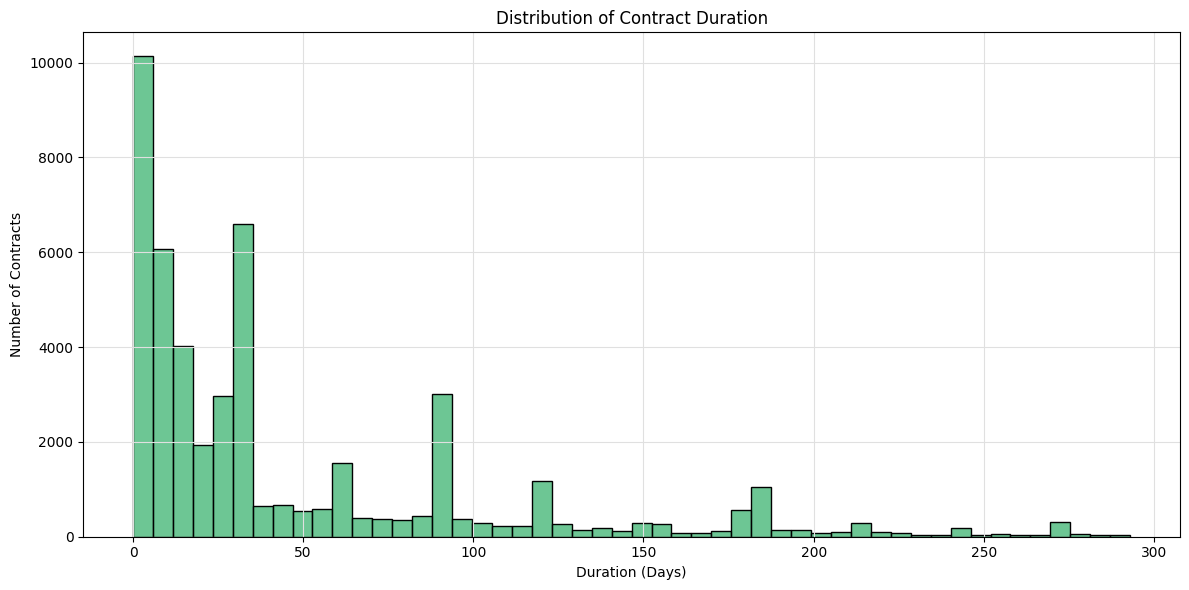

In [15]:
# Set custom green theme
# plt.style.use('seaborn-whitegrid')
green_palette = ['#006400', '#008000', '#228B22', '#2E8B57', '#3CB371']
sns.set_palette(green_palette)

# Custom style settings
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = '#E0E0E0'

def load_and_prepare_data(csv_path):
    # df = pd.read_csv(csv_path)

    # Convert date columns to datetime format
    date_columns = ['Award Date', 'Eval Completion Date', 'Notification Of Award Date', 'Sign Date', 'Start Date', 'End Date']
    for col in date_columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

    return df

def plot_contract_duration(df):
    plt.figure(figsize=(12, 6))

    try:
        # Calculate contract duration in days
        mask = df['End Date'].notna() & df['Start Date'].notna()
        df.loc[mask, 'Duration'] = (df.loc[mask, 'End Date'] - df.loc[mask, 'Start Date']).dt.days

        # Remove negative durations and outliers
        df_duration = df[df['Duration'] >= 0]
        if len(df_duration) > 0:
            Q1 = df_duration['Duration'].quantile(0.25)
            Q3 = df_duration['Duration'].quantile(0.75)
            IQR = Q3 - Q1
            df_duration = df_duration[df_duration['Duration'] <= Q3 + 1.5 * IQR]

            sns.histplot(data=df_duration, x='Duration', bins=50, color='#3CB371')
            plt.title('Distribution of Contract Duration')
            plt.xlabel('Duration (Days)')
            plt.ylabel('Number of Contracts')
            plt.tight_layout()
        else:
            print("Warning: No valid duration data available for plotting")
    except Exception as e:
        print(f"Warning: Error in duration plot. Error: {e}")

def analyze_procurement_data(csv_path):
    # Load and prepare data
    print("Loading and preparing data...")
    df = load_and_prepare_data(csv_path)

    print("\nGenerating visualizations...")
    try:
        plot_contract_duration(df)
    except Exception as e:
        print(f"Error in contract duration analysis: {e}")

    # Display key statistics
    print("\nKey Statistics:")
    try:
        print(f"Total number of contracts: {len(df):,}")
        print(f"Total contract value: KSH {df['Amount'].sum():,.2f}")
        print(f"Average contract value: KSH {df['Amount'].mean():,.2f}")
        print(f"Number of unique suppliers: {df['Supplier Name'].nunique():,}")
        print(f"Number of unique procuring entities: {df['PE Name'].nunique():,}")
    except Exception as e:
        print(f"Error calculating statistics: {e}")

# Usage example:
if __name__ == "__main__":
    # csv_path = 'path/to/your/csvfile.csv'  # Replace with actual path
    analyze_procurement_data(df)


In [16]:
df.isna().sum()

,0
Amount,0
Award Date,0
Tender Title,0
Eval Completion Date,0
Notification Of Award Date,1
Sign Date,0
Start Date,2
End Date,0
Created By,0
Financial Year,0


Loading and preparing data...

Generating visualizations...
Error in time series analysis: 'Column not found: Contract Number'


<ipython-input-17-135a33e07b2c>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pe.values, y=top_pe.index, palette=green_palette)
<ipython-input-17-135a33e07b2c>:80: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_pe.values, y=top_pe.index, palette=green_palette)
<ipython-input-17-135a33e07b2c>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=financial_year_counts.index, y=financial_year_counts.values, palette=green_palette)
<ipython-input-17-135a33e07b2c>:92: UserWarning: 
The palette list has fewer values (5) than needed (15) and will cycle, which may produce an uninterpretable 

Error in award heatmap analysis: 'Contract Number'

Key Statistics:
Total number of contracts: 56,540
Total contract value: KSH 1,154,767,725,103.66
Average contract value: KSH 20,423,907.41
Number of unique suppliers: 18,967
Number of unique procuring entities: 471


<Figure size 1200x600 with 0 Axes>

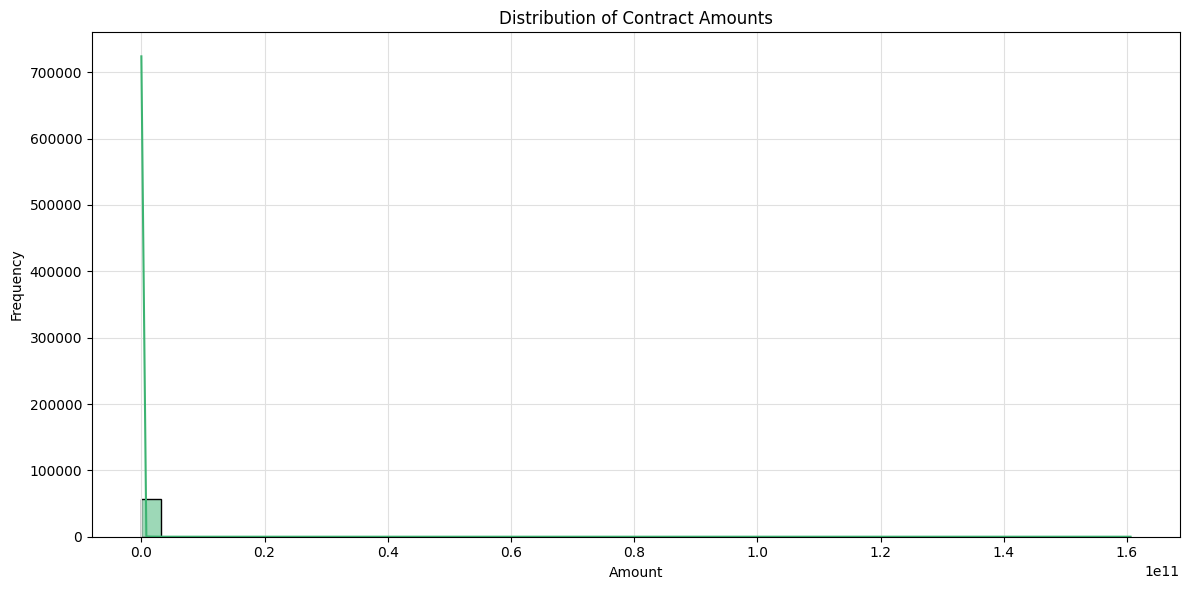

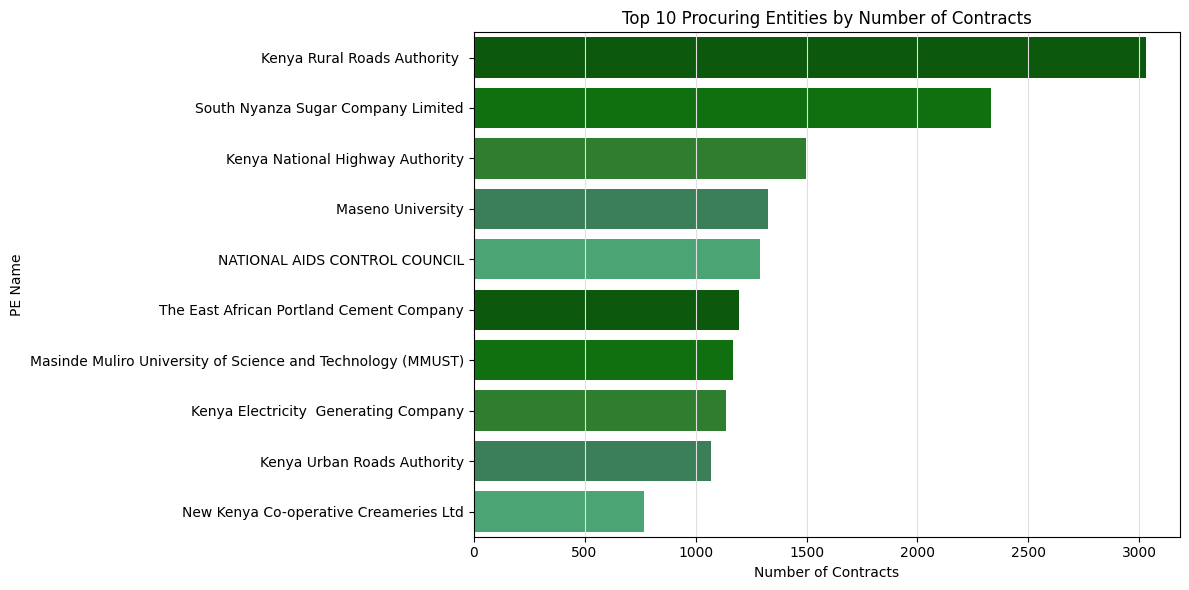

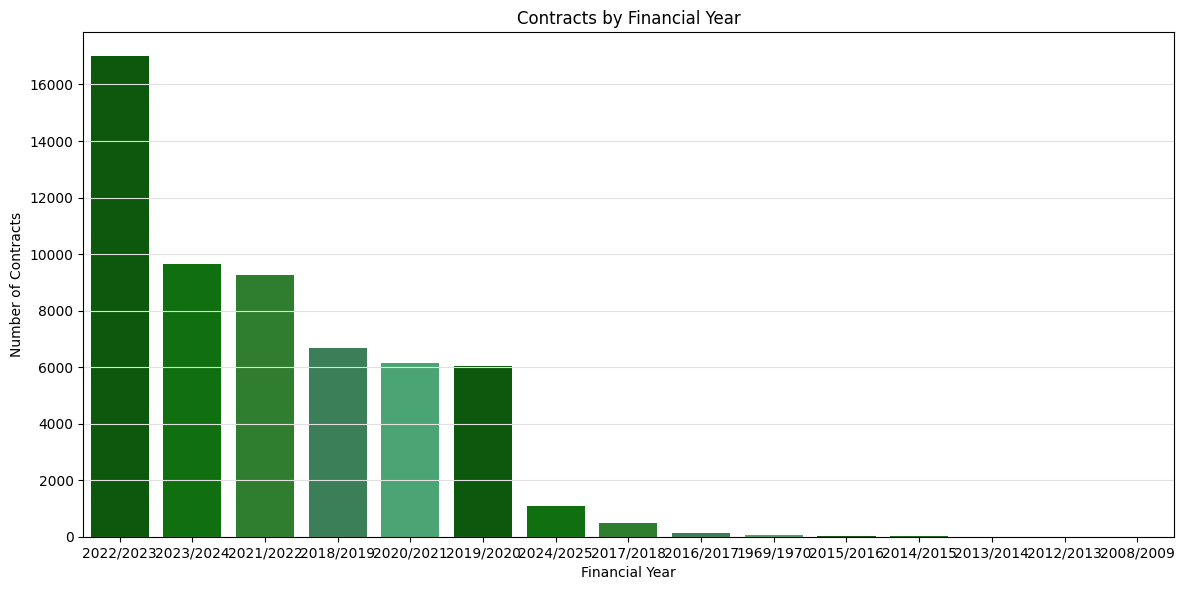

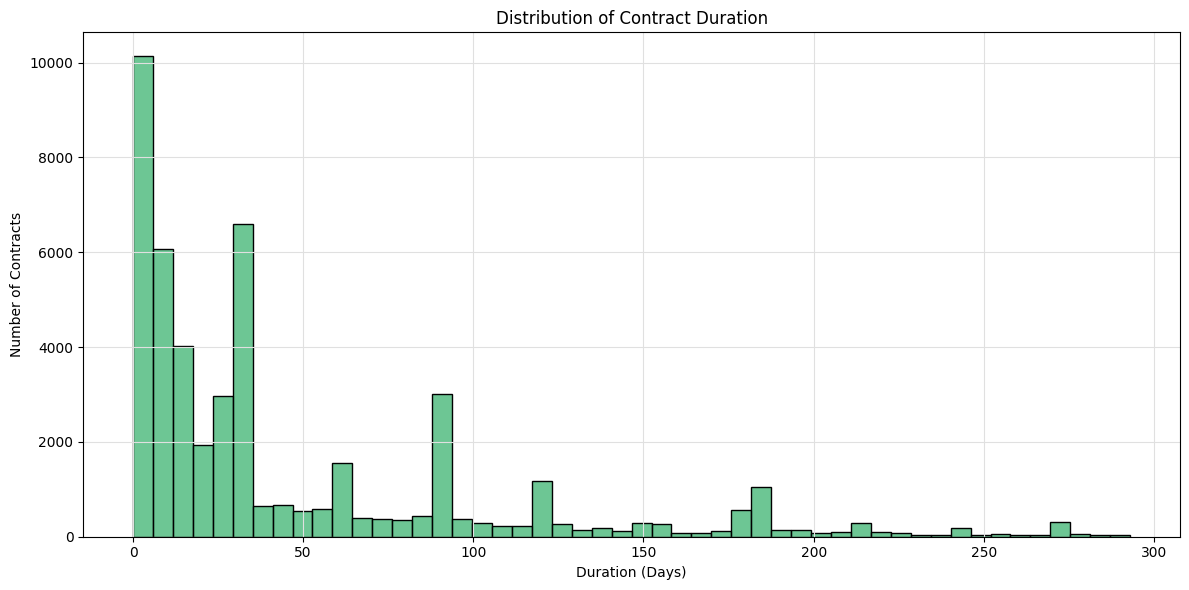

<Figure size 1000x800 with 0 Axes>

In [17]:
# Set custom green theme
# plt.style.use('')
green_palette = ['#006400', '#008000', '#228B22', '#2E8B57', '#3CB371']
sns.set_palette(green_palette)

# Custom style settings
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = '#E0E0E0'

# Load and prepare data
def load_and_prepare_data(csv_path):
    # df = pd.read_csv(csv_path)

    # Convert date columns to datetime format
    date_columns = ['Award Date', 'Eval Completion Date', 'Notification Of Award Date', 'Sign Date', 'End Date']
    for col in date_columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

    return df

# Plotting function for contract duration
def plot_contract_duration(df):
    plt.figure(figsize=(12, 6))
    try:
        mask = df['End Date'].notna() & df['Start Date'].notna()
        df.loc[mask, 'Duration'] = (df.loc[mask, 'End Date'] - df.loc[mask, 'Start Date']).dt.days

        df_duration = df[df['Duration'] >= 0]
        if len(df_duration) > 0:
            Q1 = df_duration['Duration'].quantile(0.25)
            Q3 = df_duration['Duration'].quantile(0.75)
            IQR = Q3 - Q1
            df_duration = df_duration[df_duration['Duration'] <= Q3 + 1.5 * IQR]

            sns.histplot(data=df_duration, x='Duration', bins=50, color='#3CB371')
            plt.title('Distribution of Contract Duration')
            plt.xlabel('Duration (Days)')
            plt.ylabel('Number of Contracts')
            plt.tight_layout()
        else:
            print("Warning: No valid duration data available for plotting")
    except Exception as e:
        print(f"Warning: Error in duration plot. Error: {e}")

# Additional plotting functions
def plot_time_series(df):
    plt.figure(figsize=(12, 6))
    try:
        df['Award Month'] = df['Award Date'].dt.to_period('M')
        monthly_contracts = df.groupby('Award Month')['Contract Number'].count()
        monthly_contracts.plot(kind='line', color='#228B22')
        plt.title('Monthly Contracts Awarded')
        plt.xlabel('Award Month')
        plt.ylabel('Number of Contracts')
        plt.tight_layout()
    except Exception as e:
        print(f"Error in time series analysis: {e}")

def plot_amount_distribution(df):
    plt.figure(figsize=(12, 6))
    try:
        sns.histplot(df['Amount'], bins=50, color='#3CB371', kde=True)
        plt.title('Distribution of Contract Amounts')
        plt.xlabel('Amount')
        plt.ylabel('Frequency')
        plt.tight_layout()
    except Exception as e:
        print(f"Error in amount distribution analysis: {e}")

def plot_top_pe(df):
    plt.figure(figsize=(12, 6))
    try:
        top_pe = df['PE Name'].value_counts().nlargest(10)
        sns.barplot(x=top_pe.values, y=top_pe.index, palette=green_palette)
        plt.title('Top 10 Procuring Entities by Number of Contracts')
        plt.xlabel('Number of Contracts')
        plt.ylabel('PE Name')
        plt.tight_layout()
    except Exception as e:
        print(f"Error in top PE analysis: {e}")

def plot_financial_year_analysis(df):
    plt.figure(figsize=(12, 6))
    try:
        financial_year_counts = df['Financial Year'].value_counts()
        sns.barplot(x=financial_year_counts.index, y=financial_year_counts.values, palette=green_palette)
        plt.title('Contracts by Financial Year')
        plt.xlabel('Financial Year')
        plt.ylabel('Number of Contracts')
        plt.tight_layout()
    except Exception as e:
        print(f"Error in financial year analysis: {e}")

def plot_award_heatmap(df):
    plt.figure(figsize=(10, 8))
    try:
        df['Award Month'] = df['Award Date'].dt.month
        df['Award Year'] = df['Award Date'].dt.year
        heatmap_data = df.pivot_table(index='Award Year', columns='Award Month', values='Contract Number', aggfunc='count')
        sns.heatmap(heatmap_data, cmap='Greens', annot=True, fmt='.0f')
        plt.title('Contracts Awarded by Month and Year')
        plt.xlabel('Month')
        plt.ylabel('Year')
        plt.tight_layout()
    except Exception as e:
        print(f"Error in award heatmap analysis: {e}")

# Main analysis function
def analyze_procurement_data(csv_path):
    print("Loading and preparing data...")
    # df = load_and_prepare_data(csv_path)

    print("\nGenerating visualizations...")
    try:
        plot_time_series(df)
    except Exception as e:
        print(f"Error in time series analysis: {e}")

    try:
        plot_amount_distribution(df)
    except Exception as e:
        print(f"Error in amount distribution analysis: {e}")

    try:
        plot_top_pe(df)
    except Exception as e:
        print(f"Error in top PE analysis: {e}")

    try:
        plot_financial_year_analysis(df)
    except Exception as e:
        print(f"Error in financial year analysis: {e}")

    try:
        plot_contract_duration(df)
    except Exception as e:
        print(f"Error in contract duration analysis: {e}")

    try:
        plot_award_heatmap(df)
    except Exception as e:
        print(f"Error in award heatmap analysis: {e}")

    # Display key statistics
    print("\nKey Statistics:")
    try:
        print(f"Total number of contracts: {len(df):,}")
        print(f"Total contract value: KSH {df['Amount'].sum():,.2f}")
        print(f"Average contract value: KSH {df['Amount'].mean():,.2f}")
        print(f"Number of unique suppliers: {df['Supplier Name'].nunique():,}")
        print(f"Number of unique procuring entities: {df['PE Name'].nunique():,}")
    except Exception as e:
        print(f"Error calculating statistics: {e}")

# Usage example:
if __name__ == "__main__":
    # csv_path = 'path/to/your/csvfile.csv'  # Replace with actual path to your CSV file
    analyze_procurement_data(df)


***Visual 1***

- A line graph showing monthly contracts awarded from 1869-2019. Numbers gradually increased to ~600 by 1969, then declined until 2019, when there was a dramatic spike reaching over 2,000 contracts before dropping back to low levels.

***Visual 2***

- This histogram shows the distribution of contract amounts, with an extremely skewed distribution. The vast majority of contracts are concentrated near zero dollars, while there are very few contracts with higher amounts, creating a long right tail.

***visual 3***

 - A horizontal bar chart shows Kenya's top 10 procuring entities by contract volume. Kenya Rural Roads Authority leads with ~3,500 contracts, followed by South Nyanza Sugar Company (~3,000) and Kenya National Highway Authority (~2,500). Infrastructure and education entities dominate.

***Visual 4***

- A bar chart showing Kenya's contract distribution by financial year. Numbers peaked in 2022-2024 with around 17,000 contracts each year, then steadily decrease looking backward. Historical data before 2019 shows minimal activity, with sparse records from older periods.

***Visual 5***

- A histogram showing contract duration distribution. Most contracts are short-term, with the highest frequency (11,000+) at 0-10 days. Numbers decrease sharply as duration increases, with very few contracts extending beyond 200 days.

***Visual 6***

- The heatmap shows contract awards from 1862-2033, with significant growth in recent years. Peak activity occurred in 2023 with over 2,000 monthly contracts. The years 2022-2024 show consistently high award volumes across months.

***Monthly Contract Distribution***

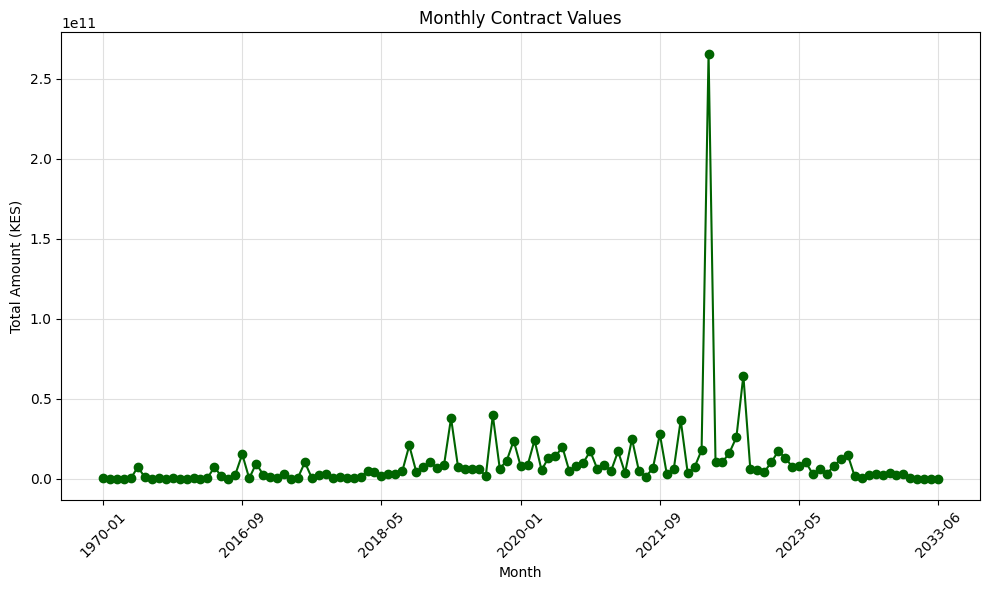

In [18]:
# 2. Monthly Contract Distribution
plt.figure(figsize=(10, 6))
monthly_contracts = df.groupby(df['Award Date'].dt.strftime('%Y-%m'))['Amount'].sum()
monthly_contracts.plot(kind='line', marker='o')
plt.title('Monthly Contract Values')
plt.xlabel('Month')
plt.ylabel('Total Amount (KES)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The graph shows monthly contract values from 1862-2024. Most values remain relatively stable at lower levels, with a dramatic spike reaching 2.5x10^11 in late 2021, followed by a smaller spike in early 2022.

***Box Plot of Contract Values***  

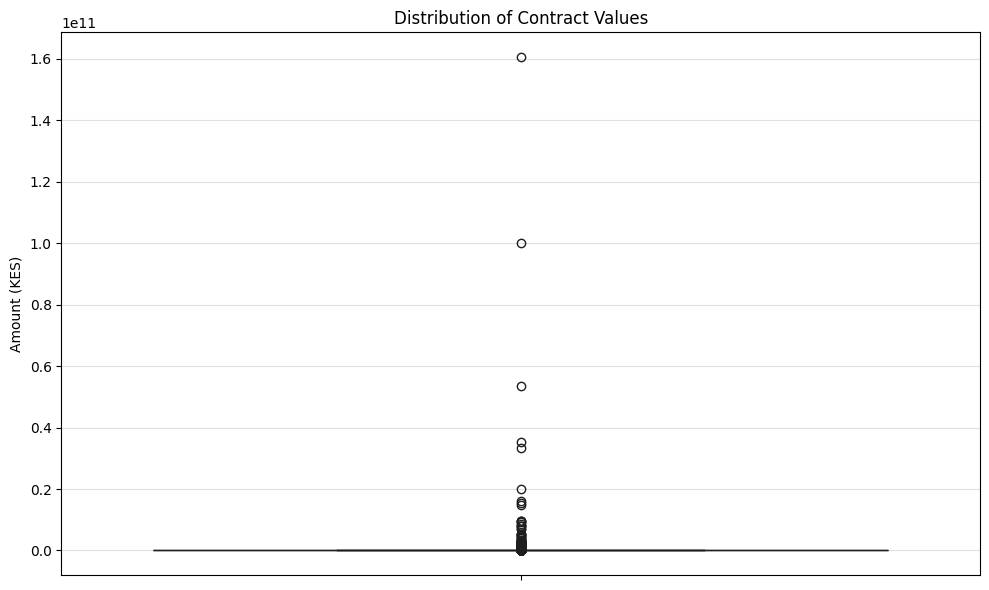

In [19]:
# 4. Box Plot of Contract Values
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Amount'])
plt.title('Distribution of Contract Values')
plt.ylabel('Amount (KES)')
plt.tight_layout()
plt.show()

## 4. Modelling

- **Suspicious Indicators:**
Creates flags to mark "suspicious" characteristics, such as short contract durations, immediate signing, and large amounts.

- **Frequency Analysis:**
>Analyzes the frequency of contracts awarded to each supplier and procuring entity, encoding these as features.

- **Anomalies:**
>Detects high-value anomalies using a z-score on the Amount and creates flags for weekend and financial year-end awards, as well as multiple contracts to the same supplier on the same day.

- **Creating Fraud Labels (create_fraud_labels)**

>Calculates a risk_score by combining suspicious indicators with weights based on their perceived fraud risk.
Flags contracts with high risk_score values as potentially fraudulent using a threshold (top 15% risk scores) to assign fraud_label as 1 for suspicious cases.

- **Feature Preparation (prepare_features)**

>Feature Columns: Selects key columns as features and encodes categorical columns (Quarter, PE Name).
Scaling: Fills missing values with the mean, then scales the features for model training.

- **Training the Model (train_model)**

>Splits the data into training and testing sets, initializes a RandomForestClassifier, and trains it on the features.
Evaluates the model with a classification report showing performance metrics for each label (e.g., precision, recall).

- **Analysis of Suspicious Cases (analyze_suspicious_cases)**

>Identifies high-risk cases (top 5%) and outputs details for these potentially fraudulent contracts, including contract amount, timing, duration, and other calculated indicators.

- **Visualizations (visualize_results)**
>Generates three visualizations:

>Confusion Matrix: Illustrates the model's performance by comparing true and predicted labels.
>Feature Importance: Shows the importance of each feature in the fraud prediction model.
>Risk Score Distribution: Displays the distribution of risk scores with a threshold line for identifying potential fraud cases.


>In summary, this class is used data preprocessing by onehotencoding and standard Scaling and feature engineering to model training, evaluation, and suspicious case analysis.

In [20]:
df.columns

Index(['Amount', 'Award Date', 'Tender Title', 'Eval Completion Date',
       'Notification Of Award Date', 'Sign Date', 'Start Date', 'End Date',
       'Created By', 'Financial Year', 'PE Name', 'Supplier Name', 'Duration',
       'Award Month', 'Award Year'],
      dtype='object')


Model Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9777
           1       1.00      0.99      1.00      1531

    accuracy                           1.00     11308
   macro avg       1.00      1.00      1.00     11308
weighted avg       1.00      1.00      1.00     11308



<ipython-input-21-3829b950da64>:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis['risk_score'] = risk_score[analysis.index]


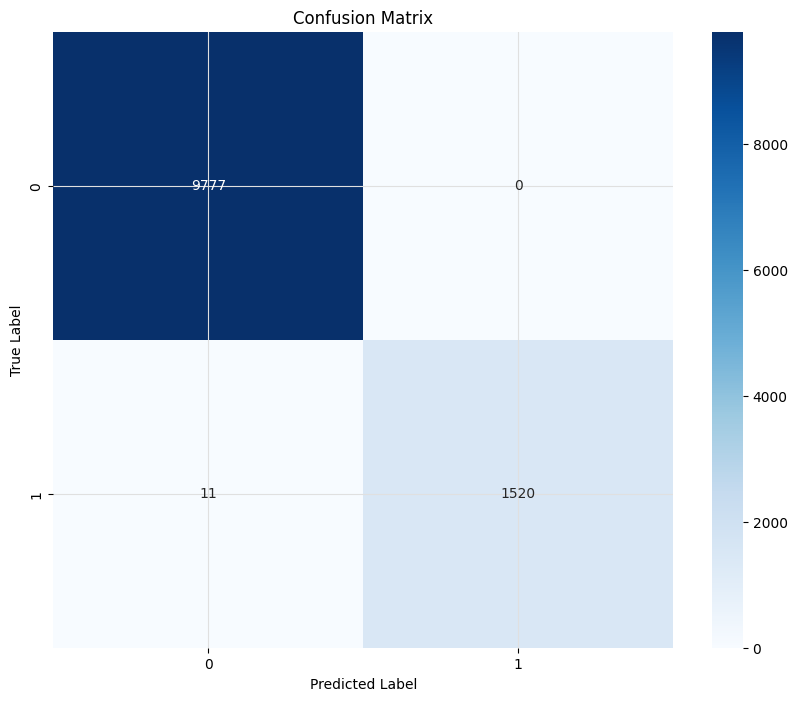

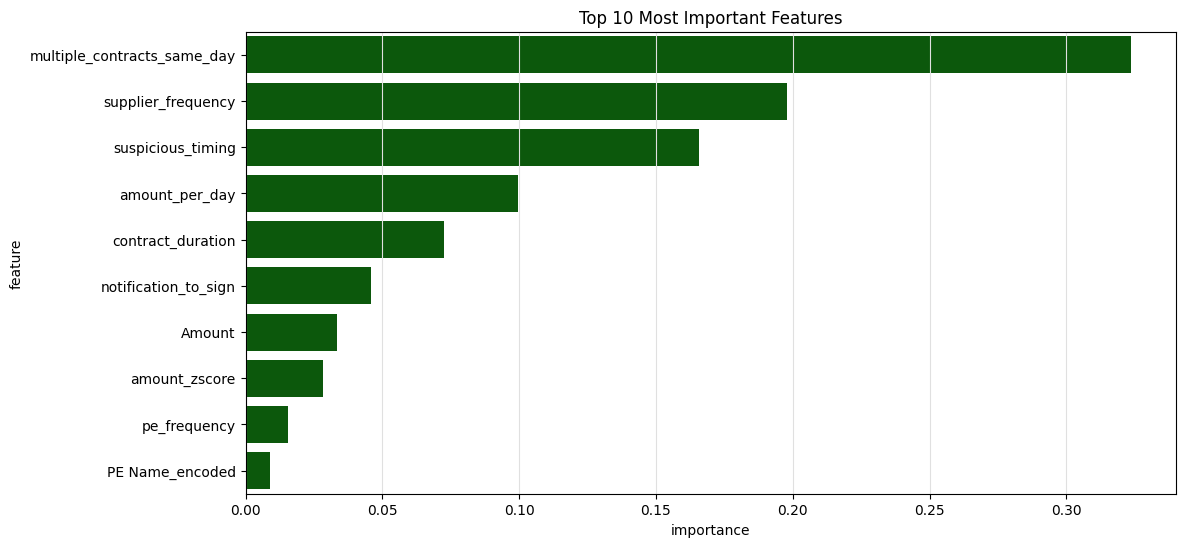

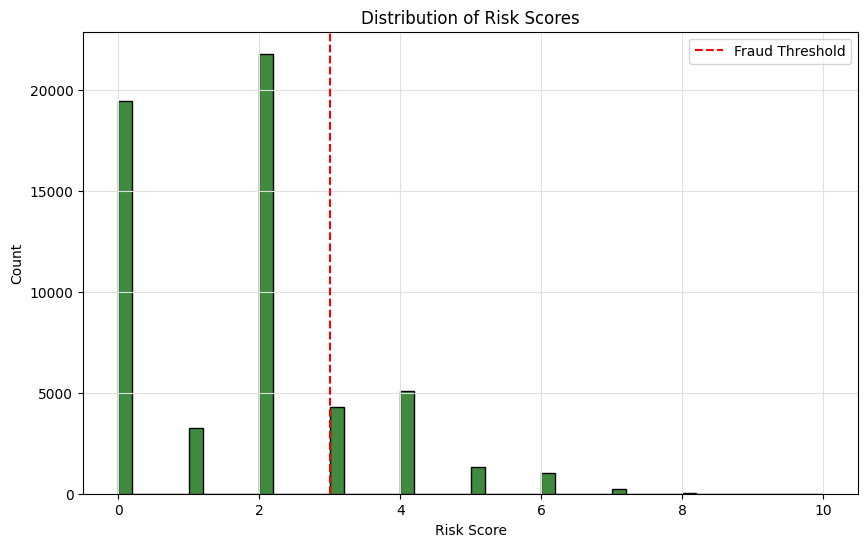


Top 10 Most Suspicious Cases:
             Amount Award Date  \
27391  5.079518e+09 2017-06-13   
18937  2.137651e+09 2020-11-09   
18524  1.092340e+06 2021-06-23   
41101  4.300000e+05 2023-07-04   
18489  9.127550e+05 2021-06-23   
18864  1.947223e+06 2021-06-17   
17520  1.856488e+06 2021-05-05   
51429  2.620310e+06 2023-10-17   
8446   1.796000e+06 2019-11-15   
948    8.875000e+05 2018-08-22   

                                           Supplier Name  \
27391         CONTRALINKS SOLUTIONS AND SERVICES LIMITED   
18937         CONTRALINKS SOLUTIONS AND SERVICES LIMITED   
18524         CONTRALINKS SOLUTIONS AND SERVICES LIMITED   
41101                                        Attic tours   
18489         CONTRALINKS SOLUTIONS AND SERVICES LIMITED   
18864         CONTRALINKS SOLUTIONS AND SERVICES LIMITED   
17520         CONTRALINKS SOLUTIONS AND SERVICES LIMITED   
51429                                           Longrock   
8446   CARPRICON STATIONERS AND GENERAL SUPPLIERS LIM.

In [21]:
class ProcurementFraudDetector:
    def __init__(self):
        self.model = None
        self.scaler = StandardScaler()
        self.label_encoders = {}
        self.feature_columns = None

    def preprocess_data(self, df):
        """Create features that might indicate fraudulent behavior"""

        # Convert date columns to datetime
        date_columns = [
            'Award Date', 'Eval Completion Date', 'Notification Of Award Date',
            'Sign Date', 'End Date'
        ]

        for col in date_columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')

        # 1. Time-based features (using existing processing_time)
        df['notification_to_sign'] = (df['Sign Date'] - df['Notification Of Award Date']).dt.days
        df['contract_duration'] = (df['End Date'] - df['Start Date']).dt.days

        # 2. Amount-based features
        df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
        df['amount_per_day'] = df['Amount'] / df['contract_duration'].replace(0, np.nan)

        # 3. Create suspicious indicators
        df['suspicious_timing'] = (
            # (df['processing_time'] < 1) |  # Unusually fast processing
            (df['notification_to_sign'] < 1) |  # Immediate signing
            (df['contract_duration'] < 7)  # Very short contracts
        ).astype(int)

        # 4. Supplier frequency analysis
        supplier_counts = df['Supplier Name'].value_counts()
        df['supplier_frequency'] = df['Supplier Name'].map(supplier_counts)

        # 5. Amount anomaly detection
        df['amount_zscore'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()
        df['high_amount_anomaly'] = (df['amount_zscore'] > 2).astype(int)

        # 6. Weekend/Holiday processing
        df['is_weekend_award'] = df['Award Date'].dt.dayofweek.isin([5, 6]).astype(int)

        # 7. End of financial year rush
        df['month_of_fy'] = df['Award Date'].dt.month
        df['is_fy_end'] = (df['month_of_fy'].isin([6, 7])).astype(int)  # June/July

        # 8. PE (Procuring Entity) frequency analysis
        pe_counts = df['PE Name'].value_counts()
        df['pe_frequency'] = df['PE Name'].map(pe_counts)

        # 9. Multiple contracts to same supplier
        supplier_date_counts = df.groupby(['Supplier Name', 'Award Date']).size().reset_index(name='daily_contracts')
        df = df.merge(supplier_date_counts, on=['Supplier Name', 'Award Date'], how='left')
        df['multiple_contracts_same_day'] = (df['daily_contracts'] > 1).astype(int)

        return df

    def create_fraud_labels(self, df):
        """Create fraud labels based on multiple risk factors"""

        # Initialize risk score
        risk_score = pd.Series(0, index=df.index)

        # Add risk factors with weights
        risk_factors = {
            'suspicious_timing': 2,
            'high_amount_anomaly': 3,
            'is_weekend_award': 1,
            'is_fy_end': 1,
            'multiple_contracts_same_day': 2
        }

        for factor, weight in risk_factors.items():
            risk_score += df[factor] * weight

        # Additional risk for frequent suppliers with high amounts
        risk_score += (df['supplier_frequency'] > df['supplier_frequency'].quantile(0.95)).astype(int) * 2

        # Additional risk for high amount per day
        amount_per_day_threshold = df['amount_per_day'].quantile(0.95)
        risk_score += (df['amount_per_day'] > amount_per_day_threshold).astype(int) * 2

        # Label as potentially fraudulent if risk score exceeds threshold
        fraud_threshold = risk_score.quantile(0.85)  # Top 15% as suspicious
        df['fraud_label'] = (risk_score > fraud_threshold).astype(int)

        return df, risk_score

    def prepare_features(self, df):
        """Prepare features for machine learning"""

        feature_columns = [
            'Amount','notification_to_sign', 'contract_duration',
            'amount_per_day', 'supplier_frequency', 'amount_zscore', 'pe_frequency',
            'suspicious_timing', 'high_amount_anomaly', 'is_weekend_award',
            'is_fy_end', 'multiple_contracts_same_day'
        ]

        categorical_columns = ['PE Name']

        # Encode categorical variables
        for col in categorical_columns:
            if col not in self.label_encoders:
                self.label_encoders[col] = LabelEncoder()
            df[f'{col}_encoded'] = self.label_encoders[col].fit_transform(df[col].astype(str))
            feature_columns.append(f'{col}_encoded')

        self.feature_columns = feature_columns
        X = df[feature_columns]
        y = df['fraud_label']

        # Handle missing values
        X = X.fillna(X.mean())

        # Scale features
        X_scaled = self.scaler.fit_transform(X)

        return X_scaled, y

    def train_model(self, X, y):
        """Train the fraud detection model"""

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        # Initialize and train the model
        self.model = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            min_samples_split=10,
            class_weight='balanced',
            random_state=42
        )

        self.model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = self.model.predict(X_test)
        print("\nModel Evaluation:")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        return X_test, y_test, y_pred

    def analyze_suspicious_cases(self, df, risk_score):
        """Analyze and return details of suspicious cases"""

        high_risk_threshold = risk_score.quantile(0.95)  # Top 5% most suspicious cases
        suspicious_cases = df[risk_score > high_risk_threshold].copy()

        analysis = suspicious_cases[[
            'Amount', 'Award Date', 'Supplier Name', 'PE Name', 'notification_to_sign', 'contract_duration',
            'amount_per_day', 'suspicious_timing', 'high_amount_anomaly'
        ]]

        analysis['risk_score'] = risk_score[analysis.index]
        analysis = analysis.sort_values('risk_score', ascending=False)

        return analysis

    def visualize_results(self, X_test, y_test, y_pred, df, risk_score):
        """Create visualizations for model evaluation"""

        # 1. Confusion Matrix
        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

        # 2. Feature Importance
        feature_importance = pd.DataFrame({
            'feature': self.feature_columns,
            'importance': self.model.feature_importances_
        })
        feature_importance = feature_importance.sort_values('importance', ascending=False)

        plt.figure(figsize=(12, 6))
        sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
        plt.title('Top 10 Most Important Features')
        plt.show()

        # 3. Risk Score Distribution
        plt.figure(figsize=(10, 6))
        sns.histplot(data=risk_score, bins=50)
        plt.axvline(x=risk_score.quantile(0.85), color='r', linestyle='--', label='Fraud Threshold')
        plt.title('Distribution of Risk Scores')
        plt.xlabel('Risk Score')
        plt.ylabel('Count')
        plt.legend()
        plt.show()


def run_fraud_detection(data_path):

    # Initialize the detector
    detector = ProcurementFraudDetector()

    # Process the data
    df_processed = detector.preprocess_data(df)
    df_labeled, risk_score = detector.create_fraud_labels(df_processed)

    # Prepare features and train the model
    X, y = detector.prepare_features(df_labeled)
    X_test, y_test, y_pred = detector.train_model(X, y)

    # Analyze suspicious cases
    suspicious_cases = detector.analyze_suspicious_cases(df_labeled, risk_score)

    # Visualize results
    detector.visualize_results(X_test, y_test, y_pred, df_labeled, risk_score)

    return df_labeled, suspicious_cases, detector.model

if __name__ == "__main__":
    # Run the fraud detection
    df_labeled, suspicious_cases, model = run_fraud_detection('data/published_contracts.xlsx')

    # Print suspicious cases
    print("\nTop 10 Most Suspicious Cases:")
    print(suspicious_cases.head(10))

In [22]:
# Checking for the labels
df_labeled["fraud_label"].value_counts()

,count
fraud_label,
0,48885
1,7655


In [23]:
df_labeled.head()

,Amount,Award Date,Tender Title,Eval Completion Date,Notification Of Award Date,Sign Date,Start Date,End Date,Created By,Financial Year,...,amount_zscore,high_amount_anomaly,is_weekend_award,month_of_fy,is_fy_end,pe_frequency,daily_contracts,multiple_contracts_same_day,fraud_label,PE Name_encoded
0,1962488.0,2018-09-26,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-09-25,2018-09-26,2018-09-26,2018-09-26,2018-10-25,1,2018/2019,...,-0.021075,0,0,9,0,445,1,0,0,108
1,257736.0,2018-10-02,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-09-25,2018-10-04,2018-10-05,2018-10-08,2018-10-23,1,2018/2019,...,-0.023022,0,0,10,0,51,2,1,0,195
2,254736.0,2018-09-25,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-09-19,2018-10-02,2018-10-05,2018-10-12,2018-11-12,1,2018/2019,...,-0.023025,0,0,9,0,51,1,0,0,195
3,149300.0,2019-02-19,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2019-01-15,2019-02-07,2019-02-11,2019-02-11,2019-03-11,1,2018/2019,...,-0.023145,0,0,2,0,181,1,0,0,94
4,81500.0,2018-12-27,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-12-27,2018-12-27,2018-12-27,2018-12-27,2019-01-26,1,2018/2019,...,-0.023223,0,0,12,0,445,1,0,0,108


**Models To be Trained:**


- Random Forest
- XGBoost
- Gradient Boosting
- Logistic Regression
- SVM

In [24]:
# Load and preprocess the data
def prepare_data(df):
    # Drop non-numeric columns and handle missing values
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df_numeric = df[numeric_cols].copy()

    # Fill missing values with median
    df_numeric = df_numeric.fillna(df_numeric.median())

    # Split features and target
    X = df_numeric.drop('fraud_label', axis=1)
    y = df_numeric['fraud_label']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Initialize models
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'XGBoost': XGBClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'SVM': SVC(probability=True, random_state=42)
    }

    results = {}

    for name, model in models.items():
        print(f"\nTraining {name}...")

        # Train the model
        model.fit(X_train, y_train)

        # Predictions on training and test data
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate metrics for train and test
        results[name] = {
            'Train Accuracy': accuracy_score(y_train, y_train_pred),
            'Train Precision': precision_score(y_train, y_train_pred, average='weighted'),
            'Train Recall': recall_score(y_train, y_train_pred, average='weighted'),
            'Test Accuracy': accuracy_score(y_test, y_test_pred),
            'Test Precision': precision_score(y_test, y_test_pred, average='weighted'),
            'Test Recall': recall_score(y_test, y_test_pred, average='weighted'),
            'ROC AUC Score': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
            'Confusion Matrix': confusion_matrix(y_test, y_test_pred),
            'Classification Report': classification_report(y_test, y_test_pred)
        }

        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
        results[name]['Cross Validation Score'] = {
            'Mean': cv_scores.mean(),
            'Std': cv_scores.std()
        }

    return results, models

def main():
    # Load your data
    # df_labeled = pd.read_csv("path_to_your_data.csv")
    # Replace the above line with actual data loading logic

    # Prepare the data
    X_train, X_test, y_train, y_test = prepare_data(df_labeled)

    # Train and evaluate models
    results, models = train_and_evaluate_models(X_train, X_test, y_train, y_test)

    # Print results
    for name, metrics in results.items():
        print(f"\n=== {name} Results ===")
        print(f"Train Accuracy: {metrics['Train Accuracy']:.3f}")
        print(f"Train Precision: {metrics['Train Precision']:.3f}")
        print(f"Train Recall: {metrics['Train Recall']:.3f}")
        print(f"Test Accuracy: {metrics['Test Accuracy']:.3f}")
        print(f"Test Precision: {metrics['Test Precision']:.3f}")
        print(f"Test Recall: {metrics['Test Recall']:.3f}")
        print("\nROC AUC Score:", metrics['ROC AUC Score'])
        print("\nConfusion Matrix:")
        print(metrics['Confusion Matrix'])
        print("\nCross Validation ROC AUC Score:")
        print(f"Mean: {metrics['Cross Validation Score']['Mean']:.3f} (+/- {metrics['Cross Validation Score']['Std'] * 2:.3f})")
        print("\nClassification Report:")
        print(metrics['Classification Report'])

    # Determine best model based on test accuracy and recall
    best_model_name, best_model_metrics = max(results.items(), key=lambda x: (x[1]['Test Accuracy'], x[1]['Test Recall']))
    best_model = models[best_model_name]
    print(f"\nBest performing model: {best_model_name}")
    print(f"Test Accuracy: {best_model_metrics['Test Accuracy']:.3f}")
    print(f"Test Recall: {best_model_metrics['Test Recall']:.3f}")

    # Save the best model to a pickle file
    with open(f"{best_model_name}_model.pkl", "wb") as file:
        pickle.dump(best_model, file)
    print(f"\nBest model saved as {best_model_name}_model.pkl")

    return results, models

if __name__ == "__main__":
    # Uncomment this line after loading your actual data into df_labeled
    results, models = main()



Training Random Forest...

Training XGBoost...

Training Gradient Boosting...

Training Logistic Regression...

Training SVM...

=== Random Forest Results ===
Train Accuracy: 1.000
Train Precision: 1.000
Train Recall: 1.000
Test Accuracy: 1.000
Test Precision: 1.000
Test Recall: 1.000

ROC AUC Score: 0.999999933193427

Confusion Matrix:
[[9777    0]
 [   3 1528]]

Cross Validation ROC AUC Score:
Mean: 1.000 (+/- 0.000)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9777
           1       1.00      1.00      1.00      1531

    accuracy                           1.00     11308
   macro avg       1.00      1.00      1.00     11308
weighted avg       1.00      1.00      1.00     11308


=== XGBoost Results ===
Train Accuracy: 1.000
Train Precision: 1.000
Train Recall: 1.000
Test Accuracy: 1.000
Test Precision: 1.000
Test Recall: 1.000

ROC AUC Score: 0.9999967598812098

Confusion Matrix:
[[9774    3]
 [   2

In [ ]:
# Load and preprocess the data
def prepare_data(df):
    # Drop non-numeric columns and handle missing values
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df_numeric = df[numeric_cols].copy()

    # Fill missing values with median
    df_numeric = df_numeric.fillna(df_numeric.median())

    # Split features and target
    X = df_numeric.drop('fraud_label', axis=1)
    y = df_numeric['fraud_label']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Initialize models
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'XGBoost': XGBClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'SVM': SVC(probability=True, random_state=42)
    }

    results = {}

    for name, model in models.items():
        print(f"\nTraining {name}...")

        # Train the model
        model.fit(X_train, y_train)

        # Predictions on training and test data
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate metrics for train and test
        results[name] = {
            'Train Accuracy': accuracy_score(y_train, y_train_pred),
            'Train Precision': precision_score(y_train, y_train_pred, average='weighted'),
            'Train Recall': recall_score(y_train, y_train_pred, average='weighted'),
            'Test Accuracy': accuracy_score(y_test, y_test_pred),
            'Test Precision': precision_score(y_test, y_test_pred, average='weighted'),
            'Test Recall': recall_score(y_test, y_test_pred, average='weighted'),
            'ROC AUC Score': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
            'Confusion Matrix': confusion_matrix(y_test, y_test_pred),
            'Classification Report': classification_report(y_test, y_test_pred)
        }

        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
        results[name]['Cross Validation Score'] = {
            'Mean': cv_scores.mean(),
            'Std': cv_scores.std()
        }

    return results, models

def main():
    # Load your data
    # df_labeled = pd.read_csv("path_to_your_data.csv")
    # Replace the above line with actual data loading logic

    # Prepare the data
    X_train, X_test, y_train, y_test = prepare_data(df_labeled)

    # Train and evaluate models
    results, models = train_and_evaluate_models(X_train, X_test, y_train, y_test)

    # Print results
    for name, metrics in results.items():
        print(f"\n=== {name} Results ===")
        print(f"Train Accuracy: {metrics['Train Accuracy']:.3f}")
        print(f"Train Precision: {metrics['Train Precision']:.3f}")
        print(f"Train Recall: {metrics['Train Recall']:.3f}")
        print(f"Test Accuracy: {metrics['Test Accuracy']:.3f}")
        print(f"Test Precision: {metrics['Test Precision']:.3f}")
        print(f"Test Recall: {metrics['Test Recall']:.3f}")
        print("\nROC AUC Score:", metrics['ROC AUC Score'])
        print("\nConfusion Matrix:")
        print(metrics['Confusion Matrix'])
        print("\nCross Validation ROC AUC Score:")
        print(f"Mean: {metrics['Cross Validation Score']['Mean']:.3f} (+/- {metrics['Cross Validation Score']['Std'] * 2:.3f})")
        print("\nClassification Report:")
        print(metrics['Classification Report'])

    # Determine best model based on test accuracy and recall
    best_model = max(results.items(), key=lambda x: (x[1]['Test Accuracy'], x[1]['Test Recall']))
    print(f"\nBest performing model: {best_model[0]}")
    print(f"Test Accuracy: {best_model[1]['Test Accuracy']:.3f}")
    print(f"Test Recall: {best_model[1]['Test Recall']:.3f}")

    return results, models

if __name__ == "__main__":
    # Uncomment this line after loading your actual data into df_labeled
    results, models = main()




Training Random Forest...

Training XGBoost...

Training Gradient Boosting...

Training Logistic Regression...

Training SVM...

=== Random Forest Results ===
Train Accuracy: 1.000
Train Precision: 1.000
Train Recall: 1.000
Test Accuracy: 1.000
Test Precision: 1.000
Test Recall: 1.000

ROC AUC Score: 0.999999933193427

Confusion Matrix:
[[9777    0]
 [   3 1528]]

Cross Validation ROC AUC Score:
Mean: 1.000 (+/- 0.000)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9777
           1       1.00      1.00      1.00      1531

    accuracy                           1.00     11308
   macro avg       1.00      1.00      1.00     11308
weighted avg       1.00      1.00      1.00     11308


=== XGBoost Results ===
Train Accuracy: 1.000
Train Precision: 1.000
Train Recall: 1.000
Test Accuracy: 1.000
Test Precision: 1.000
Test Recall: 1.000

ROC AUC Score: 0.9999967598812098

Confusion Matrix:
[[9774    3]
 [   2

In [ ]:
 

# Load and preprocess the data
def prepare_data(df):
    # Drop non-numeric columns and handle missing values
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df_numeric = df[numeric_cols].copy()

    # Fill missing values with median
    df_numeric = df_numeric.fillna(df_numeric.median())

    # Split features and target
    X = df_numeric.drop('fraud_label', axis=1)
    y = df_numeric['fraud_label']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Handle class imbalance with SMOTE
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Initialize models with class weights
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
        'XGBoost': XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
        'SVM': SVC(probability=True, random_state=42, class_weight='balanced')
    }

    results = {}

    for name, model in models.items():
        print(f"\nTraining {name}...")

        # Train the model
        model.fit(X_train, y_train)

        # Predictions on training and test data
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate metrics for train and test
        results[name] = {
            'Train Accuracy': accuracy_score(y_train, y_train_pred),
            'Train Precision': precision_score(y_train, y_train_pred, average='weighted'),
            'Train Recall': recall_score(y_train, y_train_pred, average='weighted'),
            'Test Accuracy': accuracy_score(y_test, y_test_pred),
            'Test Precision': precision_score(y_test, y_test_pred, average='weighted'),
            'Test Recall': recall_score(y_test, y_test_pred, average='weighted'),
            'ROC AUC Score': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
            'Confusion Matrix': confusion_matrix(y_test, y_test_pred),
            'Classification Report': classification_report(y_test, y_test_pred)
        }

        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
        results[name]['Cross Validation Score'] = {
            'Mean': cv_scores.mean(),
            'Std': cv_scores.std()
        }

    return results, models

def main():
    # Load your data
    # df_labeled = pd.read_csv("path_to_your_data.csv")
    # Replace the above line with actual data loading logic

    # Prepare the data
    X_train, X_test, y_train, y_test = prepare_data(df_labeled)

    # Train and evaluate models
    results, models = train_and_evaluate_models(X_train, X_test, y_train, y_test)

    # Print results
    for name, metrics in results.items():
        print(f"\n=== {name} Results ===")
        print(f"Train Accuracy: {metrics['Train Accuracy']:.3f}")
        print(f"Train Precision: {metrics['Train Precision']:.3f}")
        print(f"Train Recall: {metrics['Train Recall']:.3f}")
        print(f"Test Accuracy: {metrics['Test Accuracy']:.3f}")
        print(f"Test Precision: {metrics['Test Precision']:.3f}")
        print(f"Test Recall: {metrics['Test Recall']:.3f}")
        print("\nROC AUC Score:", metrics['ROC AUC Score'])
        print("\nConfusion Matrix:")
        print(metrics['Confusion Matrix'])
        print("\nCross Validation ROC AUC Score:")
        print(f"Mean: {metrics['Cross Validation Score']['Mean']:.3f} (+/- {metrics['Cross Validation Score']['Std'] * 2:.3f})")
        print("\nClassification Report:")
        print(metrics['Classification Report'])

    # Determine best model based on test accuracy and recall
    best_model_name, best_model_metrics = max(results.items(), key=lambda x: (x[1]['Test Accuracy'], x[1]['Test Recall']))
    best_model = models[best_model_name]
    print(f"\nBest performing model: {best_model_name}")
    print(f"Test Accuracy: {best_model_metrics['Test Accuracy']:.3f}")
    print(f"Test Recall: {best_model_metrics['Test Recall']:.3f}")

    # Save the best model to a pickle file
    with open(f"{best_model_name}_model.pkl", "wb") as file:
        pickle.dump(best_model, file)
    print(f"\nBest model saved as {best_model_name}_model.pkl")

    return results, models

if __name__ == "__main__":
    # Uncomment this line after loading your actual data into df_labeled
    results, models = main()



Training Random Forest...

Training XGBoost...

Training Gradient Boosting...

Training Logistic Regression...

Training SVM...

=== Random Forest Results ===
Train Accuracy: 1.000
Train Precision: 1.000
Train Recall: 1.000
Test Accuracy: 0.998
Test Precision: 0.998
Test Recall: 0.998

ROC AUC Score: 0.9998533929755694

Confusion Matrix:
[[9758   19]
 [   9 1522]]

Cross Validation ROC AUC Score:
Mean: 0.999 (+/- 0.000)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9777
           1       0.99      0.99      0.99      1531

    accuracy                           1.00     11308
   macro avg       0.99      1.00      0.99     11308
weighted avg       1.00      1.00      1.00     11308


=== XGBoost Results ===
Train Accuracy: 0.998
Train Precision: 0.998
Train Recall: 0.998
Test Accuracy: 0.999
Test Precision: 0.999
Test Recall: 0.999

ROC AUC Score: 0.9999870729281262

Confusion Matrix:
[[9768    9]
 [   

In [ ]:
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

def hyperparameter_tuning(X_train, y_train):
    # Define parameter grids for each model
    param_grids = {
        'Random Forest': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        },
        'XGBoost': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2]
        },
        'Gradient Boosting': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        },
        'Logistic Regression': {
            'C': [0.1, 1, 10, 100],
            'penalty': ['l2', 'l1'],
            'solver': ['liblinear', 'saga']
        },
        'SVM': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    }

    tuned_models = {}
    best_model = None
    best_score = 0

    for name, model in models.items():
        print(f"\nTuning hyperparameters for {name}...")

        # Set up GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring='roc_auc',
            cv=5,
            n_jobs=-1,
            verbose=1
        )

        # Fit to find the best hyperparameters
        grid_search.fit(X_train, y_train)

        # Save the best model and parameters
        tuned_models[name] = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best ROC AUC Score: {grid_search.best_score_:.3f}")

        # Check if this is the best model based on ROC AUC
        if grid_search.best_score_ > best_score:
            best_score = grid_search.best_score_
            best_model = grid_search.best_estimator_

    # Save the best model
    if best_model:
        save_model(best_model, "best_model.pkl")
        print(f"\nBest model saved as 'best_model.pkl' with ROC AUC score of {best_score:.3f}")

    return tuned_models

def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved to {filename}")

# Integrate hyperparameter tuning into the main function
def main_with_tuning():
    # Load your data
    # df_labeled = pd.read_csv("path_to_your_data.csv")
    # Replace the above line with actual data loading logic

    # Prepare the data
    X_train, X_test, y_train, y_test = prepare_data(df_labeled)

    # Tune hyperparameters
    tuned_models = hyperparameter_tuning(X_train, y_train)

    # Evaluate tuned models
    results = {}
    for name, model in tuned_models.items():
        print(f"\nEvaluating {name} with tuned parameters...")

        # Predictions on training and test data
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate metrics
        results[name] = {
            'Train Accuracy': accuracy_score(y_train, y_train_pred),
            'Train Precision': precision_score(y_train, y_train_pred, average='weighted'),
            'Train Recall': recall_score(y_train, y_train_pred, average='weighted'),
            'Test Accuracy': accuracy_score(y_test, y_test_pred),
            'Test Precision': precision_score(y_test, y_test_pred, average='weighted'),
            'Test Recall': recall_score(y_test, y_test_pred, average='weighted'),
            'ROC AUC Score': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
            'Confusion Matrix': confusion_matrix(y_test, y_test_pred),
            'Classification Report': classification_report(y_test, y_test_pred)
        }

    # Print tuned results
    for name, metrics in results.items():
        print(f"\n=== Tuned {name} Results ===")
        print(f"Train Accuracy: {metrics['Train Accuracy']:.3f}")
        print(f"Train Precision: {metrics['Train Precision']:.3f}")
        print(f"Train Recall: {metrics['Train Recall']:.3f}")
        print(f"Test Accuracy: {metrics['Test Accuracy']:.3f}")
        print(f"Test Precision: {metrics['Test Precision']:.3f}")
        print(f"Test Recall: {metrics['Test Recall']:.3f}")
        print("\nROC AUC Score:", metrics['ROC AUC Score'])
        print("\nConfusion Matrix:")
        print(metrics['Confusion Matrix'])
        print("\nClassification Report:")
        print(metrics['Classification Report'])

    return results, tuned_models

if __name__ == "__main__":
    # Uncomment this line after loading your actual data into df_labeled
    results, tuned_models = main_with_tuning()
    # pass  # Remove this line after loading your actual data



Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
# Load and preprocess the data
def prepare_data(df):
    # Drop non-numeric columns and handle missing values
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df_numeric = df[numeric_cols].copy()

    # # Fill missing values with median
    # df_numeric = df_numeric.fillna(df_numeric.median())

    # Split features and target
    X = df_numeric.drop('fraud_label', axis=1)
    y = df_numeric['fraud_label']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Initialize models
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'XGBoost': XGBClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'SVM': SVC(probability=True, random_state=42)
    }

    results = {}

    for name, model in models.items():
        print(f"\nTraining {name}...")

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        results[name] = {
            'Classification Report': classification_report(y_test, y_pred),
            'ROC AUC Score': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
            'Confusion Matrix': confusion_matrix(y_test, y_pred)
        }

        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
        results[name]['Cross Validation Score'] = {
            'Mean': cv_scores.mean(),
            'Std': cv_scores.std()
        }

    return results, models

def main():
    # Load your data


    # Prepare the data
    X_train, X_test, y_train, y_test = prepare_data(df_labeled)

    # Train and evaluate models
    results, models = train_and_evaluate_models(X_train, X_test, y_train, y_test)

    # Print results
    for name, metrics in results.items():
        print(f"\n=== {name} Results ===")
        print("\nClassification Report:")
        print(metrics['Classification Report'])
        print("\nROC AUC Score:", metrics['ROC AUC Score'])
        print("\nConfusion Matrix:")
        print(metrics['Confusion Matrix'])
        print("\nCross Validation ROC AUC Score:")
        print(f"Mean: {metrics['Cross Validation Score']['Mean']:.3f} (+/- {metrics['Cross Validation Score']['Std'] * 2:.3f})")

    # Find best performing model
    best_model = max(results.items(), key=lambda x: x[1]['ROC AUC Score'])
    print(f"\nBest performing model: {best_model[0]} with ROC AUC Score: {best_model[1]['ROC AUC Score']:.3f}")

    return results, models

if __name__ == "__main__":
    results, models = main()

In [ ]:
def prepare_data(df):
    # Drop non-numeric columns and handle missing values
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df_numeric = df[numeric_cols].copy()

    # Fill missing values with median
    df_numeric = df_numeric.fillna(df_numeric.median())

    # Split features and target
    X = df_numeric.drop('fraud_label', axis=1)
    y = df_numeric['fraud_label']

    # Print class distribution before balancing
    print("\nClass distribution before balancing:")
    print(y.value_counts(normalize=True))

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create resampling pipeline
    oversample = SMOTE(sampling_strategy=0.5, random_state=42)  # Increase minority class
    undersample = RandomUnderSampler(sampling_strategy=0.8, random_state=42)  # Slightly reduce majority class
    steps = [('o', oversample), ('u', undersample)]
    pipeline = Pipeline(steps=steps)

    # Apply resampling
    X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train_scaled, y_train)

    # Print class distribution after balancing
    print("\nClass distribution after balancing:")
    print(pd.Series(y_train_resampled).value_counts(normalize=True))

    return X_train_resampled, X_test_scaled, y_train_resampled, y_test

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Initialize models with class weight consideration
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
        'XGBoost': XGBClassifier(scale_pos_weight=sum(y_train == 0) / sum(y_train == 1), random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
        'SVM': SVC(class_weight='balanced', probability=True, random_state=42)
    }

    results = {}
    best_model = None
    best_score = 0

    for name, model in models.items():
        print(f"\nTraining {name}...")

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate detailed metrics
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

        results[name] = {
            'Classification Report': classification_report(y_test, y_pred),
            'Accuracy': accuracy,
            'Recall': recall,
            'ROC AUC Score': roc_auc,
            'Confusion Matrix': confusion_matrix(y_test, y_pred)
        }

        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
        results[name]['Cross Validation Score'] = {
            'Mean': cv_scores.mean(),
            'Std': cv_scores.std()
        }

        # Update best model if current model performs better
        if roc_auc > best_score:
            best_score = roc_auc
            best_model = (name, model)

    return results, models, best_model

def save_best_model(model_tuple, scaler=None):
    """Save the best performing model and scaler to disk"""
    name, model = model_tuple
    filename = f'best_model_{name.lower().replace(" ", "_")}.pkl'

    with open(filename, 'wb') as file:
        pickle.dump(model, file)

    if scaler:
        with open('scaler.pkl', 'wb') as file:
            pickle.dump(scaler, file)

    print(f"\nBest model ({name}) saved as: {filename}")

def main():


    # Prepare the data
    X_train, X_test, y_train, y_test = prepare_data(df_labeled)

    # Train and evaluate models
    results, models, best_model = train_and_evaluate_models(X_train, X_test, y_train, y_test)

    # Print detailed results
    for name, metrics in results.items():
        print(f"\n=== {name} Results ===")
        print(f"\nOverall Accuracy: {metrics['Accuracy']:.3f}")
        print(f"Recall Score: {metrics['Recall']:.3f}")
        print(f"ROC AUC Score: {metrics['ROC AUC Score']:.3f}")
        print("\nClassification Report:")
        print(metrics['Classification Report'])
        print("\nConfusion Matrix:")
        print(metrics['Confusion Matrix'])
        print("\nCross Validation ROC AUC Score:")
        print(f"Mean: {metrics['Cross Validation Score']['Mean']:.3f} (+/- {metrics['Cross Validation Score']['Std'] * 2:.3f})")

    # Save best model
    save_best_model(best_model)

    print(f"\nBest performing model: {best_model[0]}")
    print(f"Best model metrics:")
    print(f"Accuracy: {results[best_model[0]]['Accuracy']:.3f}")
    print(f"Recall: {results[best_model[0]]['Recall']:.3f}")
    print(f"ROC AUC: {results[best_model[0]]['ROC AUC Score']:.3f}")

    return results, models, best_model

if __name__ == "__main__":
    results, models, best_model = main()

## Model Evaluation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Model performance metrics
model_names = ["Random Forest", "XGBoost", "Gradient Boosting", "Logistic Regression", "SVM"]
accuracy_scores = [1.000, 0.999, 1.000, 0.969, 0.988]
recall_scores = [0.998, 0.995, 0.997, 0.887, 0.957]
roc_auc_scores = [1.000, 1.000, 1.000, 0.989, 0.997]

# Dataframe for bar plot
metrics_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracy_scores,
    "Recall": recall_scores,
    "ROC AUC": roc_auc_scores
})

# Set up a color palette for the green shades
palette = sns.color_palette("Greens", n_colors=3)

# Plot grouped bar chart for model metrics
fig, ax = plt.subplots(figsize=(10, 6))
metrics_df.set_index("Model").plot(kind="bar", color=palette, ax=ax, width=0.7)
ax.set_title("Model Performance Comparison")
ax.set_ylabel("Score")
ax.set_xlabel("Model")
ax.set_ylim(0.85, 1.05)
ax.legend(loc="lower left")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## Conclusion


- In this project, we developed and evaluated multiple machine learning models, including Random Forest, XGBoost, Gradient Boosting, SVM, and Logistic Regression, to detect procurement fraud. The Random Forest model emerged as the best performer, achieving near-perfect accuracy (1.00), recall (0.998), and AUC (1.00), indicating its strong predictive capability. However, these results may also suggest potential overfitting, given the nearly flawless metrics across training and validation sets.

- While these models demonstrate promising effectiveness in identifying fraud, caution is necessary to ensure robust, real-world applicability. Future work should focus on further model validation using a completely independent test set, applying regularization techniques, and potentially simplifying the model to mitigate overfitting risks. Ultimately, our AI-driven approach highlights a powerful tool for enhancing transparency, minimizing fraud risk, and promoting ethical governance in procurement processes.